# AE for Application

Idea is to train AE for final result, rather than simply for representation. This seems most idea when future steps are based on ML methods as we can condense entire sequence of ML models. Effectively should be based on the question of if a model performs better when it has more information to consider, but a more complex problem or the combination of limited info models.

Think I need each wafer to go through NN then combine into one batch. not that hard. redo in torch wiith new structure.

## imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py as h5
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms

import os
import tensorflow as tf

2023-01-31 11:00:44.388990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 11:01:05.788706: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-31 11:01:05.789164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-31 11:01:05.789198: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [11]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                            train=True, 
                                       transform=transforms.Compose([torchvision.transforms.ToTensor(),
 transforms.Lambda(lambda x: torch.flatten(x))]),  
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=False, 
                                           transform=transforms.Compose([torchvision.transforms.ToTensor(), transforms.Lambda(lambda x: torch.flatten(x))])) 

In [12]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                            batch_size=batch_size, 
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size*100, 
                                           shuffle=False) 

In [13]:
batch_size = 50
epochs_ae = 100
epochs_reg = 100
lr = 0.005
ae_lossfn = MSE_AE_Loss
reg_lossfn = torch.nn.CrossEntropyLoss()

In [14]:
class MLP(nn.Module):
    '''
    Multilayer Perceptron for regression.
    '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
          nn.Linear(100, 64),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.ReLU(),
          nn.Linear(32, 10),
          nn.Softmax()
        )
    def forward(self, x):
        '''
          Forward pass
        '''
        return self.layers(x)

Epoch 0: Train 46.43074549015482, Test 681.864501953125
Epoch 1: Train 27.548490771013707, Test 679.9625244140625
Epoch 2: Train 24.0491834706928, Test 678.2036743164062
Epoch 3: Train 22.09078292467108, Test 627.1720581054688
Epoch 4: Train 20.948135793505617, Test 640.614990234375
Epoch 5: Train 20.055490806921206, Test 660.2119750976562
Epoch 6: Train 18.764941443258255, Test 646.1060791015625
Epoch 7: Train 18.36169476295585, Test 653.8004150390625
Epoch 8: Train 17.964126833635778, Test 702.2236938476562
Epoch 9: Train 17.711179348959853, Test 691.6189575195312
Epoch 10: Train 17.55449487676668, Test 687.1033325195312
Epoch 11: Train 17.255501870492203, Test 646.8136596679688
Epoch 12: Train 17.070397111313852, Test 640.191162109375
Epoch 13: Train 16.94103272281476, Test 646.94775390625
Epoch 14: Train 16.77463698980227, Test 619.9539184570312
Epoch 15: Train 16.606524676232787, Test 645.3894653320312
Epoch 16: Train 16.631611743376624, Test 621.5107421875
Epoch 17: Train 16.6218

Epoch 44: AE 15.426026923656464, Reg 3.0452237057685854
Epoch 45: AE 13.781222631931305, Reg 2.9629597282409668
Epoch 46: AE 14.613362456560134, Reg 3.0042610573768616
Epoch 47: AE 13.081885662078857, Reg 2.9280683851242064
Epoch 48: AE 15.01287767291069, Reg 3.0243199467658997
Epoch 49: AE 14.659754722118377, Reg 3.0067117762565614
Epoch 50: AE 14.50908218383789, Reg 2.9990327382087707
Epoch 51: AE 14.713851318359374, Reg 3.009497227668762
Epoch 52: AE 15.192287292480469, Reg 3.0330780005455016
Epoch 53: AE 14.806684445142746, Reg 3.014303071498871
Epoch 54: AE 14.18686670422554, Reg 2.982999517917633
Epoch 55: AE 13.169655064344406, Reg 2.932373561859131
Epoch 56: AE 13.548017823696137, Reg 2.9508023619651795
Epoch 57: AE 13.778018443584441, Reg 2.9620881628990174
Epoch 58: AE 14.689264419078826, Reg 3.0084628558158872
Epoch 59: AE 14.964932055473328, Reg 3.021667902469635
Epoch 60: AE 15.308880571126938, Reg 3.0390429639816285
Epoch 61: AE 14.913283553123474, Reg 3.0196189737319945


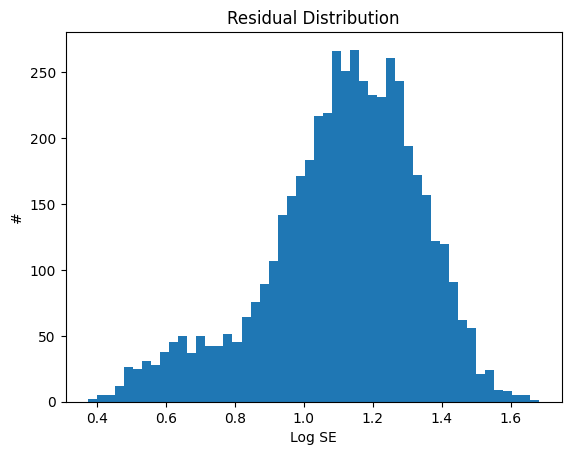

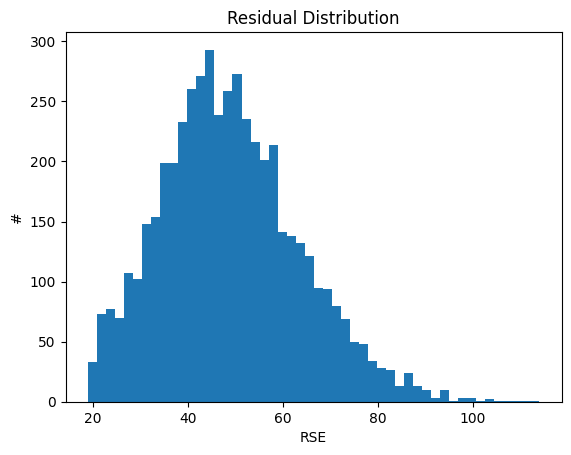

In [349]:
# fine-tune autoencoder
#batch 500

ae = Naive_DAE([28*28,200,100])




optimizer_ae = torch.optim.Adam(ae.parameters(), lr,weight_decay=5e-2)


all_test_losses = []
all_train_losses = []


# initial training of AE
running_loss = float("inf")
for epoch in range(epochs_ae):
    losses = []
    
    for i, data_list in enumerate(train_loader):
        data = data_list[0]
        v_pred = ae(data)
        batch_loss = ae_lossfn(data, v_pred) # difference between actual and reconstructed   
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer_ae.zero_grad()
        batch_loss.backward(retain_graph=True)
        optimizer_ae.step()
        if i == 200:
            break
    data_test = next(iter(test_loader))[0]
    test_pred = ae(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
# generate_stats(ae(data_test),data_test)


#Combine trainng ae and regression
reg =MLP()
optimizer_reg = torch.optim.Adam(reg.parameters(), lr,weight_decay=5e-2)

for epoch in range(epochs_reg):
    
    for i, data_list in enumerate(train_loader):
        data = data_list[0]
        pred_recon = ae(data)
        batch_ae_loss = ae_lossfn(data, pred_recon)

        data_latent = ae.encode(data)

        pred_reg = reg(data_latent.detach())
        one_hot =F.one_hot(data_list[1], num_classes=10).type(torch.DoubleTensor)

        batch_reg_loss = reg_lossfn(pred_reg,one_hot)
        if i == 200:
            break
        
        ae_loss = batch_ae_loss + 0.25 *batch_reg_loss.detach()
        
        reg_loss = 0.05 *batch_ae_loss.detach() +  batch_reg_loss
        
        
        
         # difference between actual and reconstructed   
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        
        optimizer_ae.zero_grad()
        ae_loss.backward()
        optimizer_ae.step()

        
        optimizer_reg.zero_grad()
        reg_loss.backward()
        optimizer_reg.step()
        
    
    print(f"Epoch {epoch}: AE {ae_loss.item()}, Reg {reg_loss.item()}")
generate_stats(ae(data_test),data_test)

## Method #2

Here I am training the AE and the regression in each batch concurrently. Possibly I could train them in cycles. To allow for more learning on each pattern. 

For example, train AE for 10 epochs, take this current model, train regression for 10 epochs.

Seems that AE loss should be linked to the regression, but regression loss should not be linked to AE.

In [17]:
# fine-tune autoencoder
#batch 500

ae = Naive_DAE([28*28,200,50])

optimizer_ae = torch.optim.Adam(ae.parameters(), lr,weight_decay=5e-2)


all_test_losses = []
all_train_losses = []


# initial training of AE
running_loss = float("inf")
for epoch in range(epochs_ae):
    losses = []
    
    for i, data_list in enumerate(train_loader):
        data = data_list[0]
        v_pred = ae(data)
        batch_loss = ae_lossfn(data, v_pred) # difference between actual and reconstructed   
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer_ae.zero_grad()
        batch_loss.backward(retain_graph=True)
        optimizer_ae.step()
        if i == 200:
            break
    data_test = next(iter(test_loader))[0]
    test_pred = ae(data_test)
    batch_test = ae_lossfn(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
    
    
'''

Still want an initial AE training so nothing changes here

'''


#Declare our regression MLP
reg =MLP()
optimizer_reg = torch.optim.Adam(reg.parameters(), lr,weight_decay=5e-2)



for epoch in range(epochs_reg):
    
    for i, data_list in enumerate(train_loader):
        data = data_list[0]
        
        #train AE
        if epoch % 2 == 0:
            pred_recon = ae(data)
            batch_ae_loss = ae_lossfn(data, pred_recon)
            data_latent = ae.encode(data)

            pred_reg = reg(data_latent.detach())
            one_hot =F.one_hot(data_list[1], num_classes=10).type(torch.DoubleTensor)

            batch_reg_loss = reg_lossfn(pred_reg,one_hot)
            ae_loss = batch_ae_loss + 0.25 *batch_reg_loss.detach()
            optimizer_ae.zero_grad()
            ae_loss.backward()
            optimizer_ae.step()
            
        #Train regression    
        else:
            data_latent = ae.encode(data)
            pred_reg = reg(data_latent.detach())
            one_hot =F.one_hot(data_list[1], num_classes=10).type(torch.DoubleTensor)
            batch_reg_loss = reg_lossfn(pred_reg,one_hot)
            reg_loss = batch_reg_loss
            
            optimizer_reg.zero_grad()
            reg_loss.backward()
            optimizer_reg.step()
        
       
    
    print(f"Epoch {epoch}: AE {ae_loss.item()}, Reg {reg_loss.item()}")
generate_stats(ae(data_test),data_test)

Epoch 0: Train 42.93924533787058, Test 28.674684524536133
Epoch 1: Train 25.739784307147733, Test 23.051410675048828
Epoch 2: Train 22.689771063885285, Test 21.70984649658203
Epoch 3: Train 21.104974310196454, Test 20.236186981201172
Epoch 4: Train 19.979070962364993, Test 19.231212615966797
Epoch 5: Train 19.139781524885947, Test 18.77940559387207
Epoch 6: Train 18.66438991394802, Test 18.472795486450195
Epoch 7: Train 18.43161811638827, Test 18.055160522460938
Epoch 8: Train 18.122678543204692, Test 17.868349075317383
Epoch 9: Train 17.712390652936488, Test 17.47765350341797
Epoch 10: Train 17.59605604143285, Test 17.132827758789062
Epoch 11: Train 17.20395430284946, Test 17.221054077148438
Epoch 12: Train 17.204863211408778, Test 17.434337615966797
Epoch 13: Train 17.164789669549286, Test 16.877532958984375
Epoch 14: Train 16.890301310600925, Test 16.82844352722168
Epoch 15: Train 16.892429593783707, Test 16.513872146606445
Epoch 16: Train 16.585128788924337, Test 16.35450553894043


RuntimeError: mat1 and mat2 shapes cannot be multiplied (50x50 and 100x64)

In [206]:
data = data_list[0]
pred_recon = ae(data)
batch_ae_loss = loss(data, v_pred)

data_latent = ae.encode(data)

pred_reg = reg(data_latent)
one_hot =F.one_hot(data_list[1], num_classes=10)

batch_reg_loss = loss(pred_reg,one_hot )


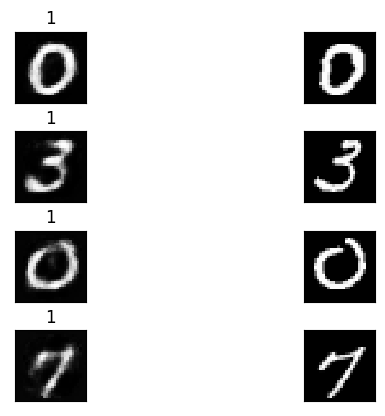

In [350]:
recon =ae(data)
recon = torch.reshape(recon,shape = (50,28,28))
fig = plt.figure()
predicted_labels =torch.argmax(reg(ae.encode(data)),dim=1)
for i in range(4):
    plt.subplot(4,2,2*i+1)
    plt.title(predicted_labels[i].item())
    plt.imshow(recon[i].detach().numpy(), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
   

    plt.subplot(4,2,2*i+2)
    plt.imshow(torch.reshape(data[i],shape = (28,28)).detach().numpy(), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

## Loss Function

Loss function made to combine reconstruction loss and energy prediction loss.

$L_{AE} = \alpha_1 L_{R} + \beta_1 L_{P} + \lambda_1 R(\theta_{AE})$

$L_{E} = \alpha_2 L_{R} + \beta_2 L_{P} + \lambda_2 R(\theta_{R})$

Where $\alpha_i$, $\beta_i$, $\lambda_i \in [0,1]$

Idea here is to not only create a possible encoding which can be decoded with minimal loss, but to weight NN such that we find a useful encoding. Similar to how solving a system with a specific basis can drastically reduce the computation. Allow our $L_{AE}$ to be aware of $L_P$ can push it to develop towards good representations. $L_E$ including the $L_{R}$ ensure that we aren't overtraining and still have an accurate representation of our wafers.


In [2]:
def MSE_AE_Loss(truth, decoded):
    dif = torch.sub(decoded, truth)
    return torch.mean(torch.sum(dif**2, dim = 1))

def MAE_AE_Loss(truth, decoded):
    return torch.mean(torch.sum(torch.abs(decoded-truth), dim = 1))


In [3]:
def mse_recon_loss(truth, decoded):
    dif = decoded - truth
    return torch.mean(torch.sum(dif**2, dim = 1))
def mse_regress_loss(truth, predicted):
    dif = predicted - truth
    return torch.mean(torch.sum(dif**2, dim = 1))

In [107]:
mse_recon_loss(torch.tensor([[2,2,2],[3,3,3]],dtype = torch.float),torch.tensor([[5,5,5],[3,3,3]]))

tensor(13.5000)

# Notes on Dev
So almost done.

Need to iterate through the train, test datasets.

might be better to train AE alone for some determined number of iterations so the results are reasonable. 

In [4]:
"""Implementation of a Deep Autoencoder"""
import torch
import torch.nn as nn
import torch.nn.functional as F



class DAE(nn.Module):
    """A Deep Autoencoder that takes a list of RBMs as input"""

    def __init__(self, models):
        """Create a deep autoencoder based on a list of RBM models

        Parameters
        ----------
        models: list[RBM]
            a list of RBM models to use for autoencoding
        """
        super(DAE, self).__init__()

        # extract weights from each model
        encoders = []
        encoder_biases = []
        decoders = []
        decoder_biases = []
        for model in models:
            encoders.append(nn.Parameter(model.W.clone()))
            encoder_biases.append(nn.Parameter(model.h_bias.clone()))
            decoders.append(nn.Parameter(model.W.clone()))
            decoder_biases.append(nn.Parameter(model.v_bias.clone()))

        # build encoders and decoders
        self.encoders = nn.ParameterList(encoders)
        self.encoder_biases = nn.ParameterList(encoder_biases)
        self.decoders = nn.ParameterList(reversed(decoders))
        self.decoder_biases = nn.ParameterList(reversed(decoder_biases))

    def forward(self, v):
        """Forward step

        Parameters
        ----------
        v: Tensor
            input tensor

        Returns
        -------
        Tensor
            a reconstruction of v from the autoencoder

        """
        # encode
        p_h = self.encode(v)

        # decode
        p_v = self.decode(p_h)

        return p_v

    def encode(self, v):  # for visualization, encode without sigmoid
        """Encode input

        Parameters
        ----------
        v: Tensor
            visible input tensor

        Returns
        -------
        Tensor
            the activations of the last layer

        """
        p_v = v
        activation = v
        for i in range(len(self.encoders)):
            W = self.encoders[i]
            h_bias = self.encoder_biases[i]
            activation = torch.mm(p_v, W) + h_bias
            p_v = activation

        # for the last layer, we want to return the activation directly rather than the sigmoid
        return activation

    def decode(self, h):
        """Encode hidden layer

        Parameters
        ----------
        h: Tensor
            activations from last hidden layer

        Returns
        -------
        Tensor
            reconstruction of original input based on h

        """
        p_h = h
        for i in range(len(self.encoders)):
            W = self.decoders[i]
            v_bias = self.decoder_biases[i]
            activation = torch.mm(p_h, W.t()) + v_bias
            p_h = activation
        return p_h


class Naive_DAE(nn.Module):
    """A Naive implementation of the DAE to be trained without RBMs"""

    def __init__(self, layers):
        """Initialize the DAE

        Parameters
        ----------
        layers: list[int]
            the number of dimensions in each layer of the DAE

        """
        super(Naive_DAE, self).__init__()

        self.layers = layers
        encoders = []
        decoders = []
        prev_layer = layers[0]
        for layer in layers[1:]:
            encoders.append(
                nn.Linear(in_features=prev_layer, out_features=layer))
            encoders.append(
                nn.ReLU())
            
            decoders.append(
                nn.Linear(in_features=layer, out_features=prev_layer))
            decoders.append(
                nn.ReLU())
           
            prev_layer = layer
        self.encoders = nn.ModuleList(encoders)
        self.decoders = nn.ModuleList(reversed(decoders))

    def forward(self, x):
        """Forward step
        
        Parameters
        ----------
        x: Tensor
            input tensor
        
        Returns
        -------
        Tensor
            a reconstructed version of x

        """
        x_encoded = self.encode(x)
        x_reconstructed = torch.sigmoid(self.decode(x_encoded))
        return x_reconstructed

    def encode(self, x):
        """Encode the input x
        
        Parameters
        ----------
        x: Tensor
            input to encode
        
        Returns
        -------
        Tensor
            encoded input

        """
        for i, enc in enumerate(self.encoders):
            if i == len(self.encoders) - 1:
                x = enc(x)
            else:
                x = enc(x)
        return x
    
    def decode(self, x):
        """Decode the representation x
        
        Parameters
        ----------
        x: Tensor
            input to decode
        
        Returns
        -------
        Tensor
            decoded input

        """
        for dec in self.decoders:
            x = dec(x)
        return x

In [5]:
def generate_stats(decoded, truth):
    eps = 10e-8
    #Printing basic info
    print(f'MSE {torch.mean(torch.sum((decoded-truth)**2,dim =1))}')
    print(f'Median {torch.median(torch.sum((decoded-truth)**2,dim =1))}')
    print(f'Standard Devitaion {torch.std(torch.sum((decoded-truth)**2,dim =1))}')
    
    
    
    #plotting residual distribution
    
    plt.figure()
    plt.hist(np.log10(torch.sum((decoded-truth).cpu()**2 +eps,dim =1).detach().numpy()), bins = 50)
    plt.xlabel('Log SE')
    plt.ylabel('#')
    plt.title('Residual Distribution')
    plt.show()
    
    plt.figure()
    plt.hist((torch.sum(torch.sqrt((decoded-truth).cpu()**2+eps),dim =1).detach().numpy()), bins = 50)
    plt.xlabel('RSE')
    plt.ylabel('#')
    plt.title('Residual Distribution')
    plt.show()
    
   

In [6]:
def train(AE,Reg, AE_optimizer,Reg_optimizer, x_train,x_test,y_train, y_test, epochs):
    AE.train()
    Reg.train()
    losses_solo_ae = []
    losses_ae = []
    losses_reg = []
    
    test_losses = []
    
    
    loss_mse = torch.nn.MSELoss()
    
    #Initial Training of AE on x_train wafers
    
    AE,losses_solo_ae, test_losses_solo_ae, _, _ = train_pos(AE,AE_optimizer, x_train,x_test, epochs)
    
            
            
    
    plt.figure()
    plt.title("AE Pre-training losses")
    plt.plot(losses_solo_ae)
    plt.plot(test_losses_solo_ae)
    plt.show()
    
    plt.figure()
    plt.title("Log AE Pre-training losses")
    plt.plot(np.log(losses_solo_ae))
    plt.plot(np.log(test_losses_solo_ae))
    plt.show()
    
    for epoch in range(epochs):
        #Iterate through batches of calorimeter
        #need to fix to iterate through 
        
        for i in range(len(x_train)):
            events = x_train[i]
            energy = y_train[i]
            
            #AE Reconstruction
            recon = AE(events)
            
            
            #Calculating Wafer Encoding Error
            AE_Loss,__ = MSE_AE_Loss(recon, events[:,0:48])
            
            
            #Encoded
            wafers_encoded = AE.out_encode(events)
            
            #Passing wafers forward into Regression NN
            events = torch.detach(torch.unsqueeze(torch.flatten(wafers_encoded),dim = 0))
            pred_energy = Reg(events)            

            
            #Calculating Regression NN Error
            Loss_reg = loss_mse(pred_energy, energy)
           

            #combining both
            AE_Loss =AE_Loss + torch.detach(Loss_reg)*0.05
            Loss_reg =0.5*torch.detach(AE_Loss) + Loss_reg
            losses_ae.append(AE_Loss.item())
            losses_reg.append(Loss_reg.item())

            
            #Step both AE with Error
            AE_Loss.backward()
            AE_optimizer.step()
                        
            Loss_reg.backward()
            Reg_optimizer.step()
        
            #Seems like we should have two or four hyperparameters for the combintation of the losses
    
    plt.figure()
    plt.title('Total Training')
    plt.plot(losses_ae, label = 'AE Loss')
    plt.plot(losses_reg, label = 'Reg Loss')
    plt.show()
    
    plt.figure()
    plt.title('Total Training')
    plt.plot(np.log(losses_ae), label = 'AE Loss')
    plt.plot(np.log(losses_reg), label = 'Reg Loss')
    plt.show()
    
        
    return AE,Reg,losses_ae, losses_reg